In [1]:
from tensorflow.keras import Input, initializers
import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
import os
import imblearn

from google.colab import drive
drive.mount('drive')
flood_data = pd.read_csv("drive/My Drive/floodPreproc.csv")

Mounted at drive


In [2]:
from numpy.random import seed
seed(1)

from tensorflow import random, config
random.set_seed(1)
config.experimental.enable_op_determinism()

import random
random.seed(2)

In [3]:
import numpy
#flood_data = flood_data.drop(flood_data[flood_data.DAMAGE > 1e7].index)
damages = np.array(np.floor(np.log10(flood_data["DAMAGE"])))
print(np.max(damages))
print(np.min(damages))
print(np.shape(damages))
y = damages - 3
X = flood_data.drop(columns= "DAMAGE")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))
print(np.sum(X_train))

9.0
3.0
(41701,)
(29190, 74)
(12511, 74)
(29190,)
(12511,)
DURATION                 4.684086e+04
LON                     -2.609641e+06
LAT                      1.109337e+06
AREA                     9.983667e+06
FATALITY                 1.155607e+04
                             ...     
dam break,dam release    1.510000e+02
heavy rain               2.032500e+04
heavy rain,snowmelt      1.356000e+03
ice jam                  2.080000e+02
snowmelt                 1.000000e+00
Length: 74, dtype: float64


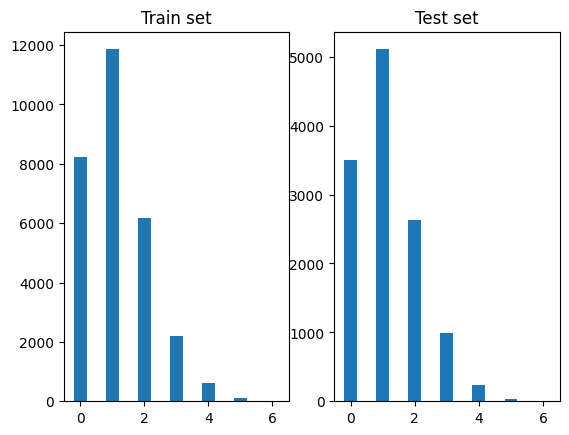

In [4]:
fig, axs = plt.subplots(1, 2)
unique, counts = np.unique(y_train, return_counts=True)
axs[0].bar(unique, counts, width=0.4)
axs[0].set_title('Train set')
unique, counts = np.unique(y_test, return_counts=True)
axs[1].bar(unique, counts, width=0.4)
axs[1].set_title('Test set')
plt.show()

In [5]:
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
for a in range(0,7):
  X_train, y_train = oversample.fit_resample(X_train, y_train)
  X_test, y_test = oversample.fit_resample(X_test, y_test)
  print(X_train.shape)
  print(y_train.shape)
  print(X_test.shape)
  print(y_test.shape)

(29190, 74)
(29190,)
(12511, 74)
(12511,)
(41035, 74)
(41035,)
(17615, 74)
(17615,)
(52801, 74)
(52801,)
(22687, 74)
(22687,)
(64056, 74)
(64056,)
(27555, 74)
(27555,)
(73715, 74)
(73715,)
(31671, 74)
(31671,)
(79400, 74)
(79400,)
(34153, 74)
(34153,)
(83020, 74)
(83020,)
(35756, 74)
(35756,)
(83020, 74)
(83020,)
(35756, 74)
(35756,)


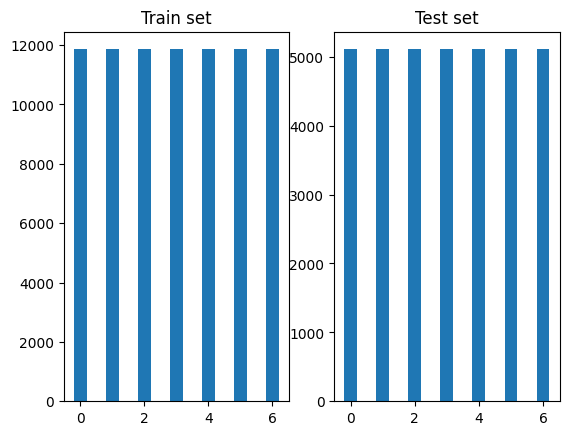

In [6]:
fig, axs = plt.subplots(1, 2)
unique, counts = np.unique(y_train, return_counts=True)
axs[0].bar(unique, counts, width=0.4)
axs[0].set_title('Train set')
unique, counts = np.unique(y_test, return_counts=True)
axs[1].bar(unique, counts, width=0.4)
axs[1].set_title('Test set')
plt.show()

In [7]:
y_train_classification = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test_classification = tf.keras.utils.to_categorical(y_test, num_classes=8)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='relu'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2400      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 32)                1

In [ ]:
from sklearn.metrics import mean_squared_error
loss = 'mse'
metric = 'mse'
epochs = 16
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=128, verbose=1, validation_data=(X_test, y_test))
predictions = model.predict(X_test)

Epoch 1/16
649/649 [==============================] - 6s 4ms/step - loss: 2.7400 - mse: 2.7400 - val_loss: 4.8330 - val_mse: 4.8330
Epoch 2/16
649/649 [==============================] - 2s 3ms/step - loss: 1.8405 - mse: 1.8405 - val_loss: 4.4010 - val_mse: 4.4010
Epoch 3/16
649/649 [==============================] - 2s 4ms/step - loss: 1.7115 - mse: 1.7115 - val_loss: 3.6554 - val_mse: 3.6554
Epoch 4/16
649/649 [==============================] - 2s 4ms/step - loss: 1.5870 - mse: 1.5870 - val_loss: 8.0035 - val_mse: 8.0035
Epoch 5/16
649/649 [==============================] - 4s 5ms/step - loss: 1.5305 - mse: 1.5305 - val_loss: 5.6983 - val_mse: 5.6983
Epoch 6/16
649/649 [==============================] - 3s 4ms/step - loss: 1.4898 - mse: 1.4898 - val_loss: 3.1526 - val_mse: 3.1526
Epoch 7/16
649/649 [==============================] - 2s 3ms/step - loss: 1.4744 - mse: 1.4744 - val_loss: 3.2889 - val_mse: 3.2889
Epoch 8/16
649/649 [==============================] - 2s 3ms/step - loss: 1.

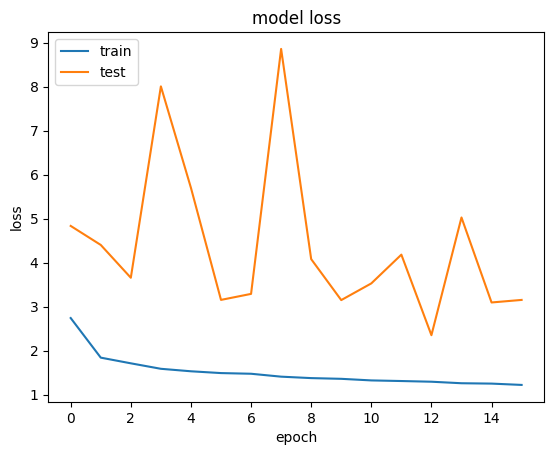

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

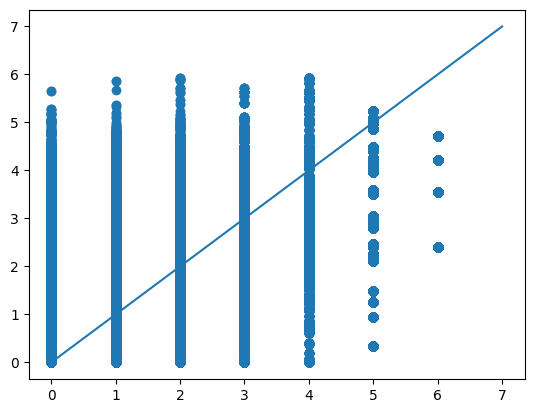

In [ ]:
plt.scatter(y_test, predictions)
plt.plot([0, 7], [0, 7])

In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation='sigmoid', kernel_initializer='random_normal'))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation='sigmoid', kernel_initializer='random_normal'))
model.add(Dense(8, activation='softmax', kernel_initializer='random_normal'))
print(model.summary())
print(X_train.shape)
print(y_train_classification.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 74)                0         
                                                                 
 dense (Dense)               (None, 64)                4800      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 9480 (37.03 KB)
Trainable params: 9480 (37.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
(83020, 74)
(8302

In [9]:
loss = 'categorical_crossentropy'
metric = 'accuracy'
epochs = 1000
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss, optimizer=opt, metrics=[metric])
history = model.fit(X_train, y_train_classification, epochs=epochs, batch_size=2048, verbose=1, validation_data=(X_test, y_test_classification))

Epoch 1/1000
41/41 [==============================] - 3s 43ms/step - loss: 1.9852 - accuracy: 0.1821 - val_loss: 1.9443 - val_accuracy: 0.2295
Epoch 2/1000
41/41 [==============================] - 1s 23ms/step - loss: 1.9238 - accuracy: 0.2313 - val_loss: 1.8915 - val_accuracy: 0.2203
Epoch 3/1000
41/41 [==============================] - 1s 21ms/step - loss: 1.8597 - accuracy: 0.2375 - val_loss: 1.8313 - val_accuracy: 0.2473
Epoch 4/1000
41/41 [==============================] - 1s 13ms/step - loss: 1.8128 - accuracy: 0.2490 - val_loss: 1.8265 - val_accuracy: 0.2503
Epoch 5/1000
41/41 [==============================] - 1s 15ms/step - loss: 1.7867 - accuracy: 0.2582 - val_loss: 1.8309 - val_accuracy: 0.2293
Epoch 6/1000
41/41 [==============================] - 1s 15ms/step - loss: 1.7609 - accuracy: 0.2726 - val_loss: 1.8224 - val_accuracy: 0.2439
Epoch 7/1000
41/41 [==============================] - 1s 13ms/step - loss: 1.7325 - accuracy: 0.2829 - val_loss: 1.8433 - val_accuracy: 0.2477

In [10]:
pred = model.predict(X_test)
#print(pred)
y_max = []
for x in pred:
  y_max.append(np.argmax(x))
print(np.unique(y_max, return_counts=True))
print(np.unique(y_test, return_counts=True))
#print(y_test[81:100])

1118/1118 [==============================] - 2s 1ms/step
(array([0, 1, 2, 3, 4, 5, 6]), array([7186, 3990, 4978, 5299, 7567, 4089, 2647]))
(array([0., 1., 2., 3., 4., 5., 6.]), array([5108, 5108, 5108, 5108, 5108, 5108, 5108]))


35756
35756
[[2937 1581  984  756  670  258    0]
 [ 764 1163  900  558  451  154    0]
 [ 524 1156 1463  969  431  435    0]
 [ 356  525  786 1358 1043 1231    0]
 [ 356  494  731 1151 1998 1551 1286]
 [ 164  180  214  259  469 1479 1324]
 [   7    9   30   57   46    0 2498]]


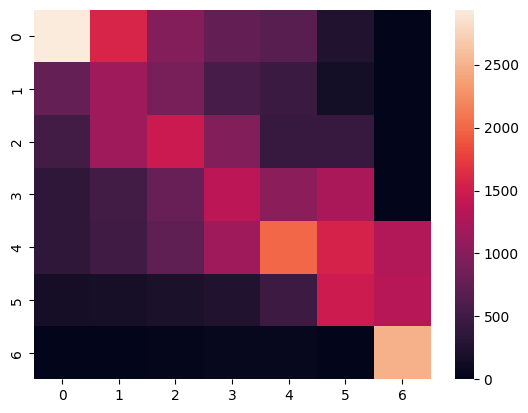

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(len(y_test))
print(len(y_max))
matrix = confusion_matrix(y_max, y_test)
sns.heatmap(matrix)
print(matrix)

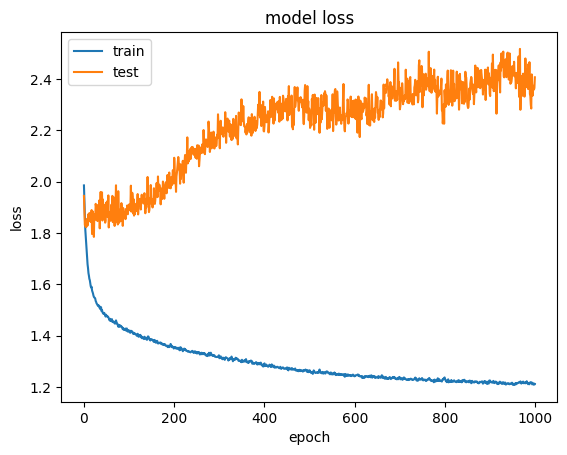

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()